In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

In [441]:
data = pd.read_csv("Car1.csv")

# Data Understanding

In [442]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [443]:
data.shape

(6019, 14)

In [444]:
data.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2658,2658,Skoda Rapid 1.5 TDI AT Elegance,Kochi,2015,66122,Diesel,Automatic,First,21.66 kmpl,1498 CC,103.52 bhp,5.0,NaN,5.96
2370,2370,Mini Cooper 3 DOOR S,Mumbai,2013,21000,Petrol,Automatic,First,17.44 kmpl,1998 CC,189.08 bhp,4.0,39.57 Lakh,21.50
1514,1514,Honda Accord 2.4 AT,Mumbai,2008,125000,Petrol,Automatic,Third,11.7 kmpl,2354 CC,177.6 bhp,5.0,NaN,2.60
1892,1892,Hyundai Creta 1.6 CRDi AT SX Plus,Kochi,2017,37024,Diesel,Automatic,First,17.01 kmpl,1582 CC,126.2 bhp,5.0,NaN,10.97
5028,5028,Honda City i VTEC VX,Kolkata,2015,32000,Petrol,Manual,First,17.8 kmpl,1497 CC,117.3 bhp,5.0,NaN,5.50


In [445]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [447]:
data.isnull().mean()*100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [448]:
data.duplicated().sum()

0

# Data Cleaning

In [449]:
data.drop(columns=["Unnamed: 0", "Location", "New_Price"], inplace=True)

In [450]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [451]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [452]:
data["Name"].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

In [453]:
data["Name"].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [454]:
data["Name"] = data["Name"].str.split(" ").str.slice(0,2).str.join(" ")

In [455]:
data["Name"].unique()

array(['Maruti Wagon', 'Hyundai Creta', 'Honda Jazz', 'Maruti Ertiga',
       'Audi A4', 'Hyundai EON', 'Nissan Micra', 'Toyota Innova',
       'Volkswagen Vento', 'Tata Indica', 'Maruti Ciaz', 'Honda City',
       'Maruti Swift', 'Land Rover', 'Mitsubishi Pajero', 'Honda Amaze',
       'Renault Duster', 'Mercedes-Benz New', 'BMW 3', 'Maruti S',
       'Audi A6', 'Hyundai i20', 'Maruti Alto', 'Honda WRV',
       'Toyota Corolla', 'Mahindra Ssangyong', 'Maruti Vitara',
       'Mahindra KUV', 'Mercedes-Benz M-Class', 'Volkswagen Polo',
       'Tata Nano', 'Hyundai Elantra', 'Hyundai Xcent', 'Mahindra Thar',
       'Hyundai Grand', 'Renault KWID', 'Hyundai i10', 'Nissan X-Trail',
       'Maruti Zen', 'Ford Figo', 'Mercedes-Benz C-Class',
       'Porsche Cayenne', 'Mahindra XUV500', 'Nissan Terrano',
       'Honda Brio', 'Ford Fiesta', 'Hyundai Santro', 'Tata Zest',
       'Maruti Ritz', 'BMW 5', 'Toyota Fortuner', 'Ford Ecosport',
       'Hyundai Verna', 'Datsun GO', 'Maruti Omni', 'Toyot

In [456]:
data["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [457]:
data["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [458]:
data["Fuel_Type"].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [459]:
data["Transmission"].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [460]:
data["Owner_Type"].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [461]:
data = data[data["Owner_Type"] != "Fourth & Above"]

In [462]:
data["Owner_Type"].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [463]:
data["Mileage"].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '19.01 kmpl',
       '14.53 kmpl', '11.18 kmpl', '12.4 kmpl', '16.09 kmpl', '14.0 kmpl',
       '24.3 kmpl', '18.15 kmpl', '11.74 kmpl', '22.07 kmpl', '19.7 kmpl',
       '25.4 kmpl', '25.32 kmpl', '14.62 kmpl', '14.28 kmpl', '14.9 kmpl',
       '11.25 kmpl', '24.4 kmpl', '16.55 kmpl', '17.11 kmpl', '22.9 kmpl',
       '17.8 kmpl', '18.9 kmpl', '15.04 kmpl', '25.17 kmpl', '20.36 kmpl',
       '13.29 kmpl', '13.68 kmpl', '20.0 kmpl', '15.8 kmpl', '25.0 kmpl',
       '16.4 kmpl', '24.52 kmpl', '22.1 kmpl', '8.5 kmpl', '15.1 kmpl',
       '16.95 kmpl', '19.64 kmpl', '16.5 kmpl', '18.53 kmpl

In [464]:
data["Mileage"] = data["Mileage"].str.split(" ").str.get(0).astype(float)

In [465]:
data = data[data["Mileage"]>0.0]

In [466]:
data["Mileage"].unique()

array([26.6 , 19.67, 18.2 , 20.77, 15.2 , 21.1 , 23.08, 11.36, 20.54,
       22.3 , 21.56, 16.8 , 25.2 , 12.7 , 13.5 , 25.8 , 28.4 , 20.45,
       14.84, 22.69, 23.65, 13.53, 18.5 , 14.4 , 20.92, 17.5 , 19.01,
       14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15, 11.74, 22.07,
       19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25, 24.4 , 16.55,
       17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36, 13.29, 13.68,
       20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 , 15.1 , 16.95,
       19.64, 16.5 , 18.53, 12.8 , 17.57, 18.  , 23.2 , 16.73, 17.  ,
       13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94, 17.71,
       14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  , 22.  ,
       21.9 , 12.05, 11.7 , 21.21, 20.73, 24.07, 19.  , 20.58, 19.27,
       11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66, 17.2 , 20.63,
       19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 , 16.6 , 22.54,
       25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81, 15.4 , 25.47,
       19.87, 17.45,

In [467]:
data["Price"] = data["Price"]*100000 
data["Price"] = data["Price"].astype(int)

In [468]:
data["Price"].unique()

array([ 175000, 1250000,  450000, ...,  227000, 1755999,  743000])

In [469]:
data.shape

(5941, 11)

Null Value Imputation

In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5941 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5941 non-null   object 
 1   Year               5941 non-null   int64  
 2   Kilometers_Driven  5941 non-null   int64  
 3   Fuel_Type          5941 non-null   object 
 4   Transmission       5941 non-null   object 
 5   Owner_Type         5941 non-null   object 
 6   Mileage            5941 non-null   float64
 7   Engine             5917 non-null   object 
 8   Power              5917 non-null   object 
 9   Seats              5912 non-null   float64
 10  Price              5941 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 533.8+ KB


In [471]:
data["Engine"] = data["Engine"].fillna(data["Engine"].mode()[0])

In [472]:
data["Engine"].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC', '2987 CC',
       '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC', '1120 CC',
       '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC', '2148 CC',
       '1396 CC', '4806 CC', '1998 CC', '2494 CC', '1193 CC', '1086 CC',
       '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC', '1799 CC',
       '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC', '2894 CC',
       '5461 CC', '1595 CC', '936 CC', '1997 CC', '1896 CC', '1390 CC',
       '1364 CC', '2199 CC', '993 CC', '999 CC', '1405 CC', '2956 CC',
       '1794 CC', '995 CC', '2496 CC', '1599 CC', '2400 CC', '1495 CC',
       '2523 CC', '793 CC', '4134 CC', '1596 CC', '1950 CC', '1395 CC',
       '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368 CC',

In [473]:
data["Engine"] = data["Engine"].str.split(" ").str.get(0).astype(int)

In [474]:
data["Power"] = data["Power"].fillna(data["Power"].mode()[0])

In [475]:
data["Power"] = data["Power"].str.split(" ").str.get(0)
data = data[data["Power"] != "null"]
data["Power"] = data["Power"].astype(float)

In [476]:
data["Power"].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 175.56 ,
        98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,  80.   ,
        67.1  , 108.45 , 138.1  , 184.   , 179.5  , 103.5  ,  64.   ,
        82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,  77.   ,  82.9  ,
       149.92 , 138.03 , 112.2  , 163.7  ,  71.   , 105.   , 174.33 ,
        75.   , 103.2  ,  53.3  ,  78.9  , 147.6  , 147.8  ,  68.   ,
       186.   , 170.   ,  69.   , 140.   ,  78.   , 500.   , 108.5  ,
        86.8  , 187.74 , 132.   , 102.   ,  86.7  ,  73.94 , 117.3  ,
       218.   , 168.5  ,  89.84 , 110.   ,  90.   ,  82.85 ,  67.   ,
       241.4  ,  35.   , 270.9  , 126.32 ,  73.   , 130.   , 100.6  ,
       150.   ,  75.94 , 215.   , 107.3  ,  37.48 , 120.   , 178.   ,
       152.   ,  91.1  ,  85.8  , 362.07 , 121.3  , 143.   ,  81.8  ,
       171.   ,  76.8  , 103.52 , 444.   , 362.9  ,  67.06 , 120.7  ,
       258.   ,  81.

In [477]:
data["Seats"] = data["Seats"].fillna(data["Seats"].mean())

In [478]:
data["Seats"].unique()

array([ 5.        ,  7.        ,  8.        ,  4.        ,  6.        ,
        2.        ,  5.28422135, 10.        ,  9.        ])

In [479]:
data["Seats"] = data["Seats"].astype(int)

In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5862 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5862 non-null   object 
 1   Year               5862 non-null   int64  
 2   Kilometers_Driven  5862 non-null   int64  
 3   Fuel_Type          5862 non-null   object 
 4   Transmission       5862 non-null   object 
 5   Owner_Type         5862 non-null   object 
 6   Mileage            5862 non-null   float64
 7   Engine             5862 non-null   int32  
 8   Power              5862 non-null   float64
 9   Seats              5862 non-null   int32  
 10  Price              5862 non-null   int32  
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 480.9+ KB


In [481]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,2010,72000,CNG,Manual,First,26.60,998,58.16,5,175000
1,Hyundai Creta,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,1250000
2,Honda Jazz,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,450000
3,Maruti Ertiga,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,600000
4,Audi A4,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,1773999


In [482]:
data.shape

(5862, 11)

In [483]:
data.duplicated().sum()

2

In [484]:
data.drop_duplicates(inplace=True)

In [485]:
data = data.reset_index(drop=True)

In [486]:
data.shape

(5860, 11)

In [487]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,2010,72000,CNG,Manual,First,26.60,998,58.16,5,175000
1,Hyundai Creta,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,1250000
2,Honda Jazz,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,450000
3,Maruti Ertiga,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,600000
4,Audi A4,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,1773999


In [488]:
data.to_csv("Cleaned_Car_Details")

# Exploratory Data Analysis

Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


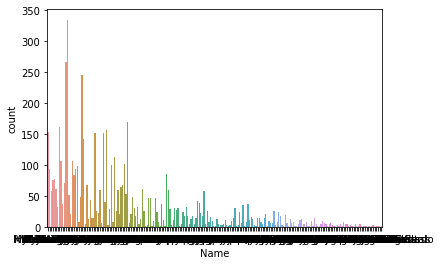

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


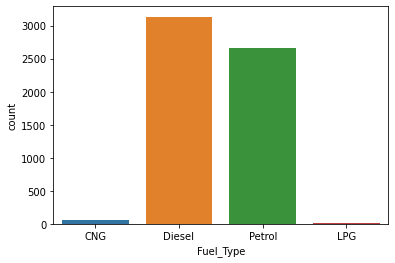

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


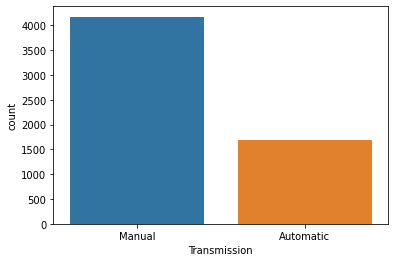

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


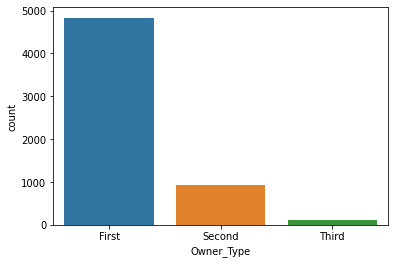

In [489]:
# Bar Plot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "object":
        plt.show(sns.countplot(data[data.columns[i]]))
        #plt.xlabel(data.columns[i])

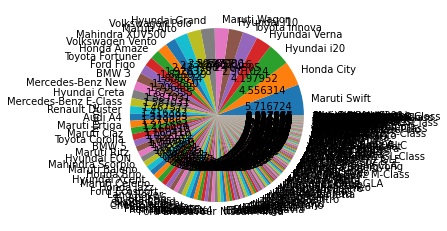

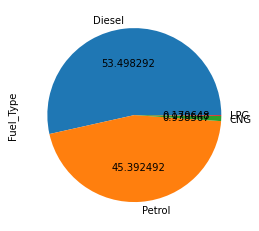

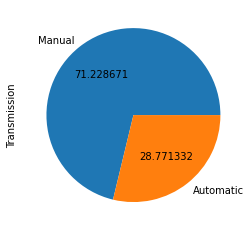

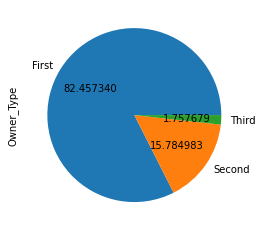

In [490]:
# Pie Chart
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "object":
        plt.show(data[data.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

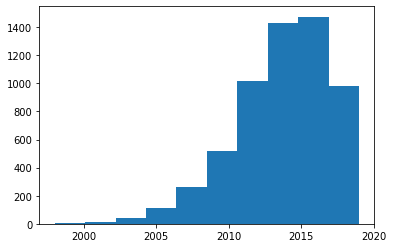

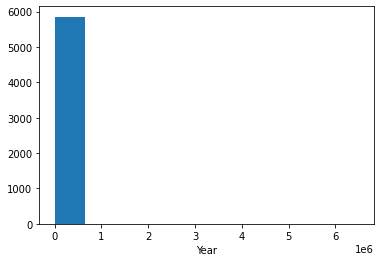

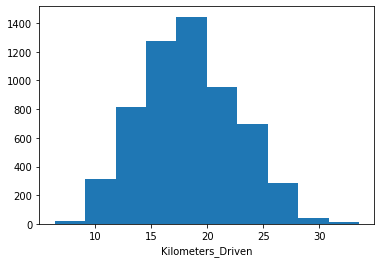

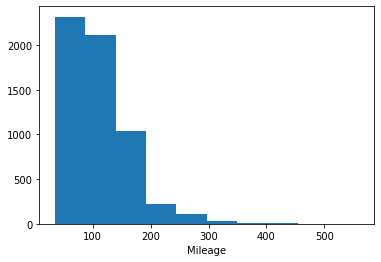

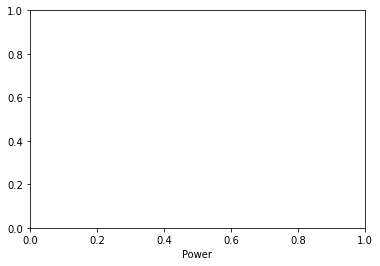

In [491]:
# Histogram
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(plt.hist(data[data.columns[i]]))
        plt.xlabel(data.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


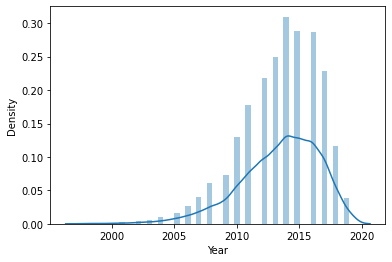

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


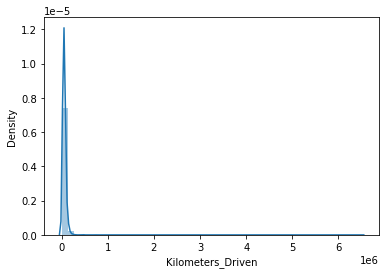

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


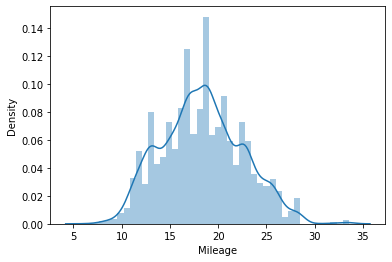

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


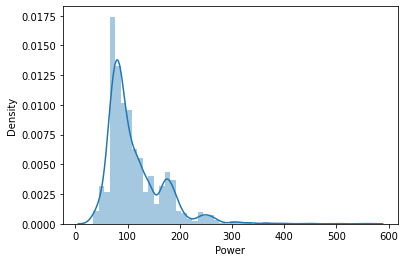

In [492]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


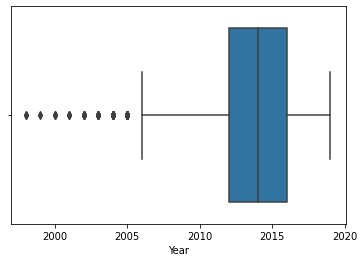

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


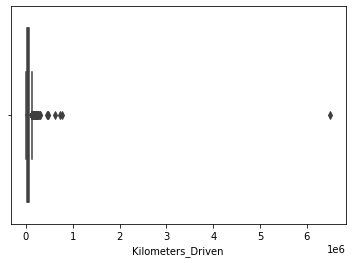

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


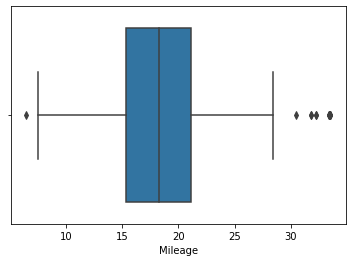

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


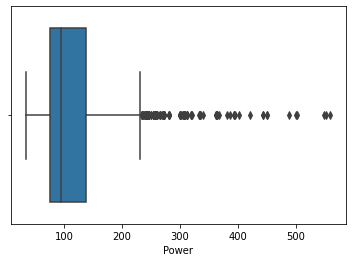

In [493]:
# BoxPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


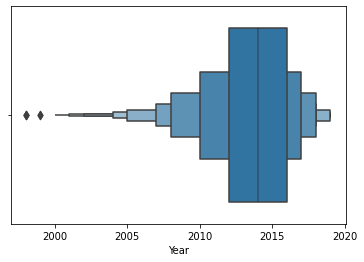

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


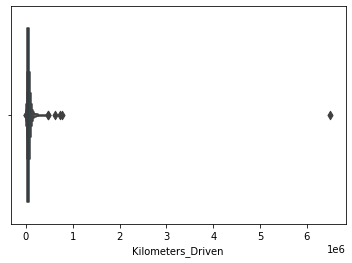

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


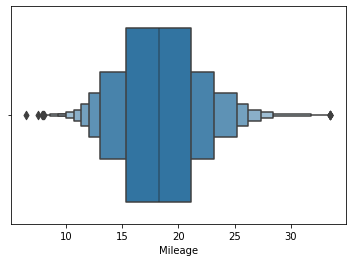

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


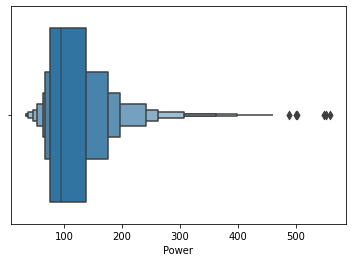

In [494]:
# BoxenPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

Bivariant Analysis

In [495]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,2010,72000,CNG,Manual,First,26.60,998,58.16,5,175000
1,Hyundai Creta,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,1250000
2,Honda Jazz,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,450000
3,Maruti Ertiga,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,600000
4,Audi A4,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,1773999


Numericaal - Categorical

Bar PLot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


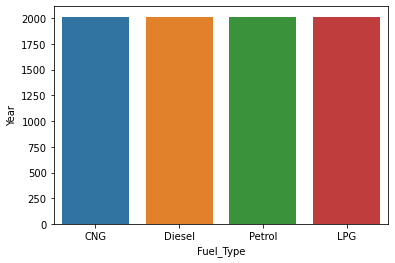

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


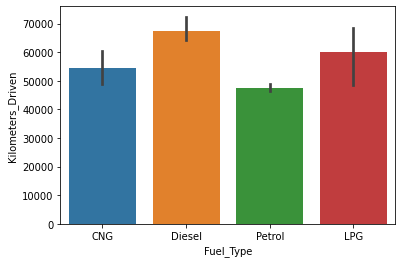

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


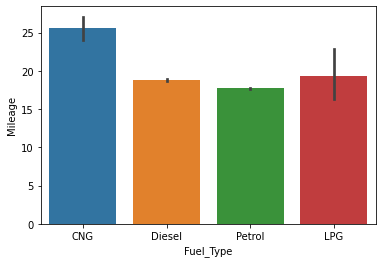

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


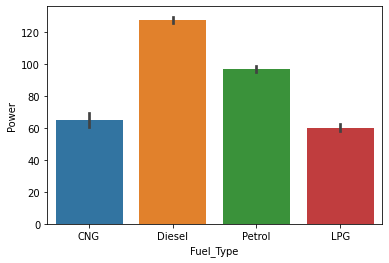

In [496]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(data["Fuel_Type"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


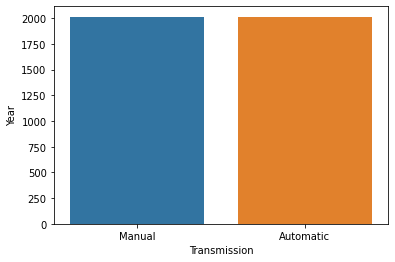

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


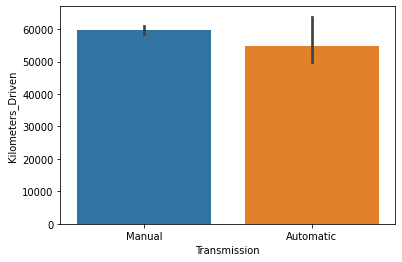

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


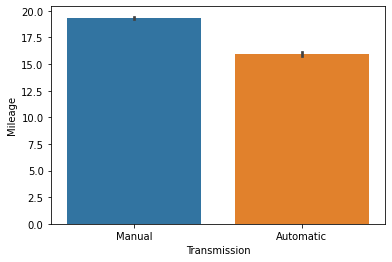

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


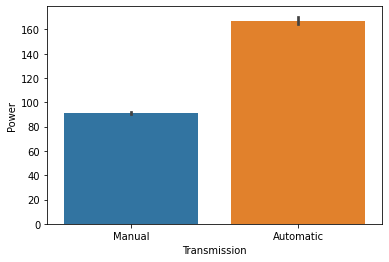

In [497]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(data["Transmission"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


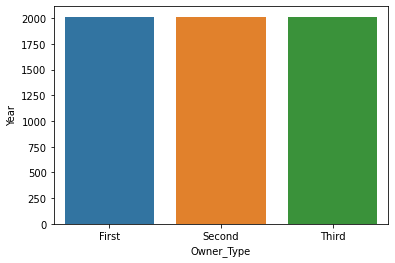

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


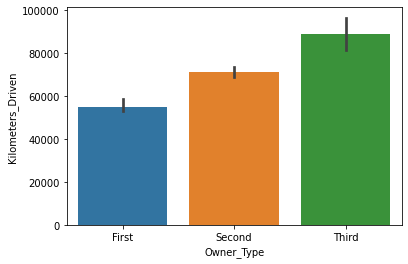

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


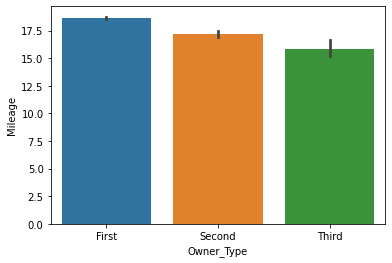

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


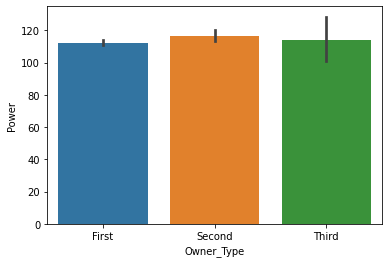

In [498]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(data["Owner_Type"], data[data.columns[i]]))

Box Plot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


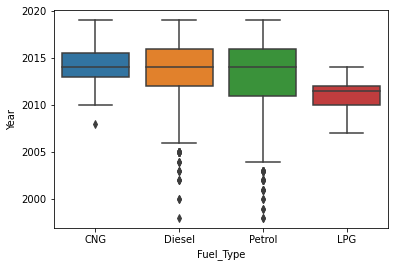

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


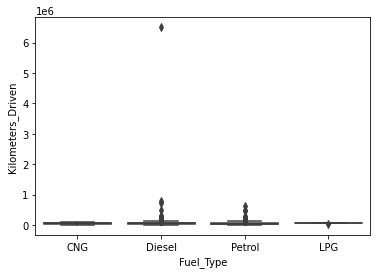

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


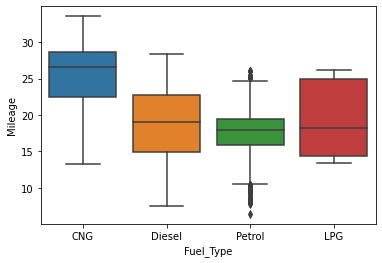

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


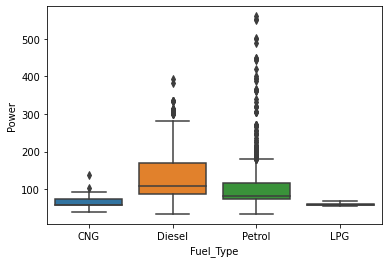

In [499]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["Fuel_Type"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


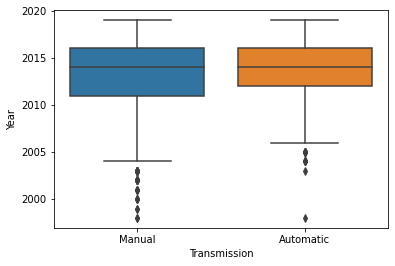

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


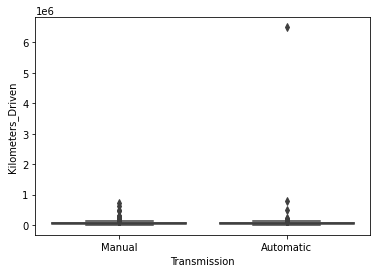

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


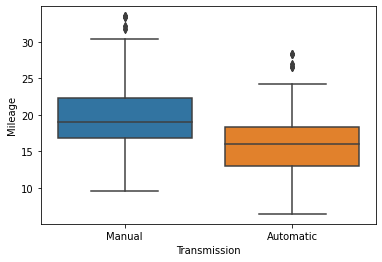

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


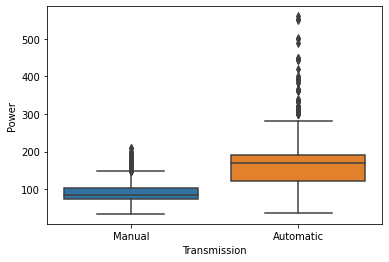

In [500]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["Transmission"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


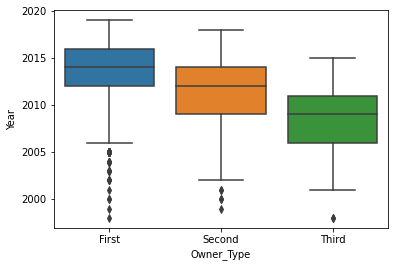

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


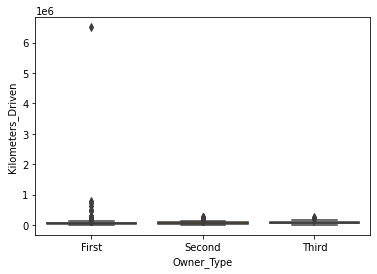

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


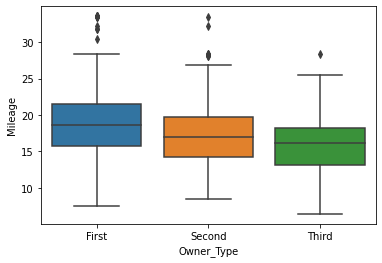

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


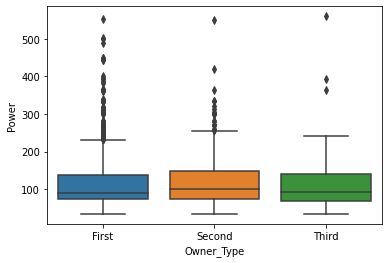

In [501]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["Owner_Type"], data[data.columns[i]]))

Categorical - Categorical

In [502]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,2010,72000,CNG,Manual,First,26.60,998,58.16,5,175000
1,Hyundai Creta,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,1250000
2,Honda Jazz,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,450000
3,Maruti Ertiga,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,600000
4,Audi A4,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,1773999


HeatMap

<AxesSubplot:xlabel='Transmission', ylabel='Fuel_Type'>

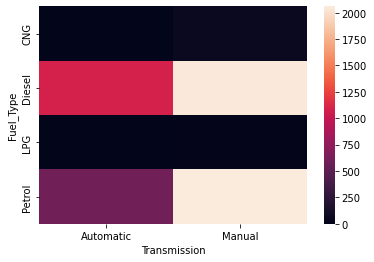

In [503]:
sns.heatmap(pd.crosstab(data["Fuel_Type"], data["Transmission"]))

<AxesSubplot:xlabel='Owner_Type', ylabel='Fuel_Type'>

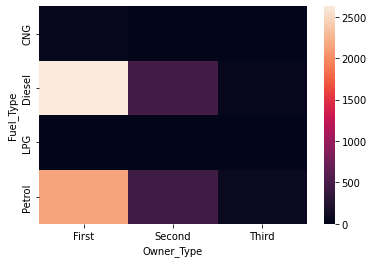

In [504]:
sns.heatmap(pd.crosstab(data["Fuel_Type"], data["Owner_Type"]))

<AxesSubplot:xlabel='Owner_Type', ylabel='Transmission'>

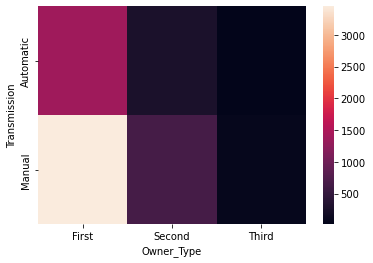

In [505]:
sns.heatmap(pd.crosstab(data["Transmission"], data["Owner_Type"]))

ClusterMap

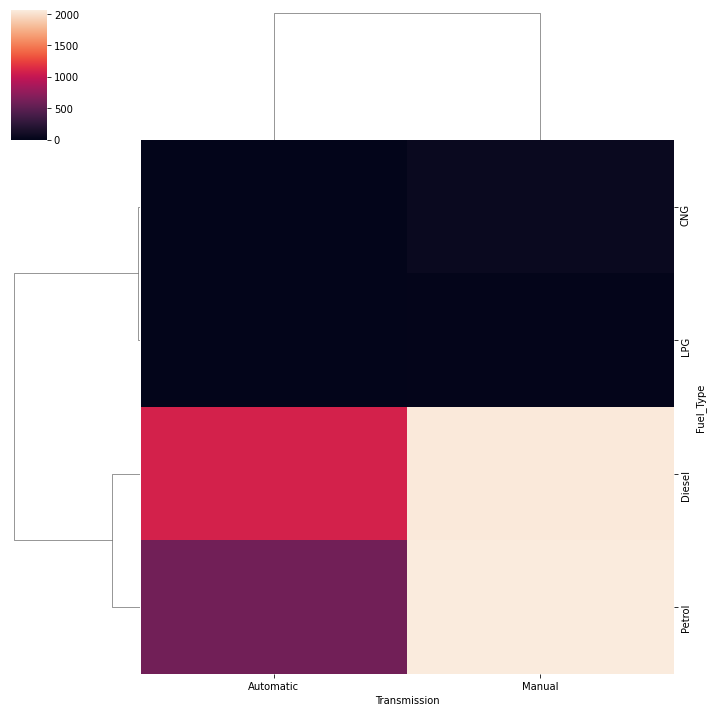

In [506]:
sns.clustermap(pd.crosstab(data["Fuel_Type"], data["Transmission"]))

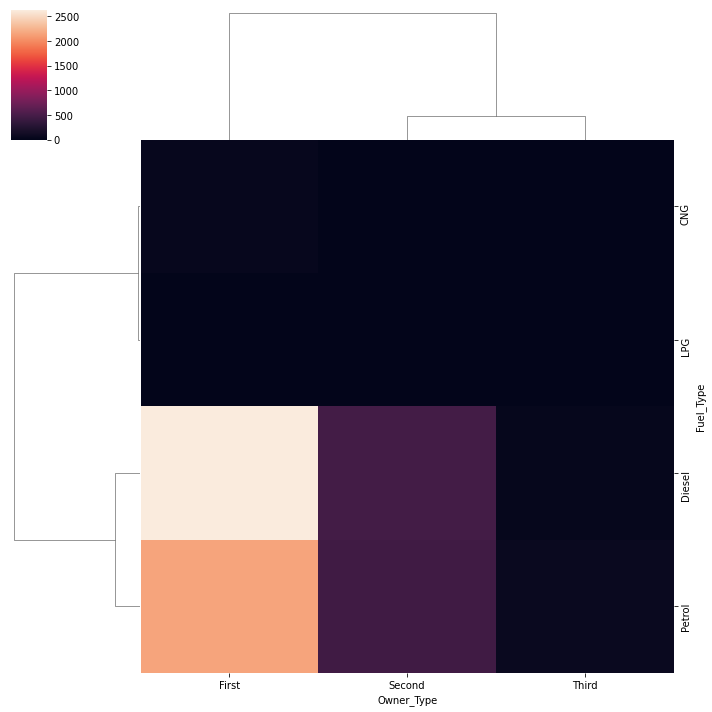

In [507]:
sns.clustermap(pd.crosstab(data["Fuel_Type"], data["Owner_Type"]))

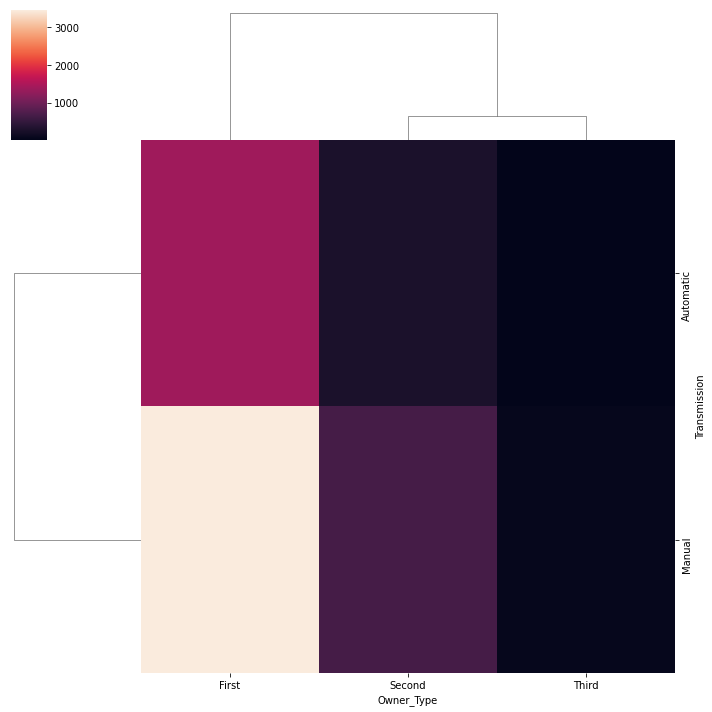

In [508]:
sns.clustermap(pd.crosstab(data["Transmission"], data["Owner_Type"]))

Multivariant Analysis

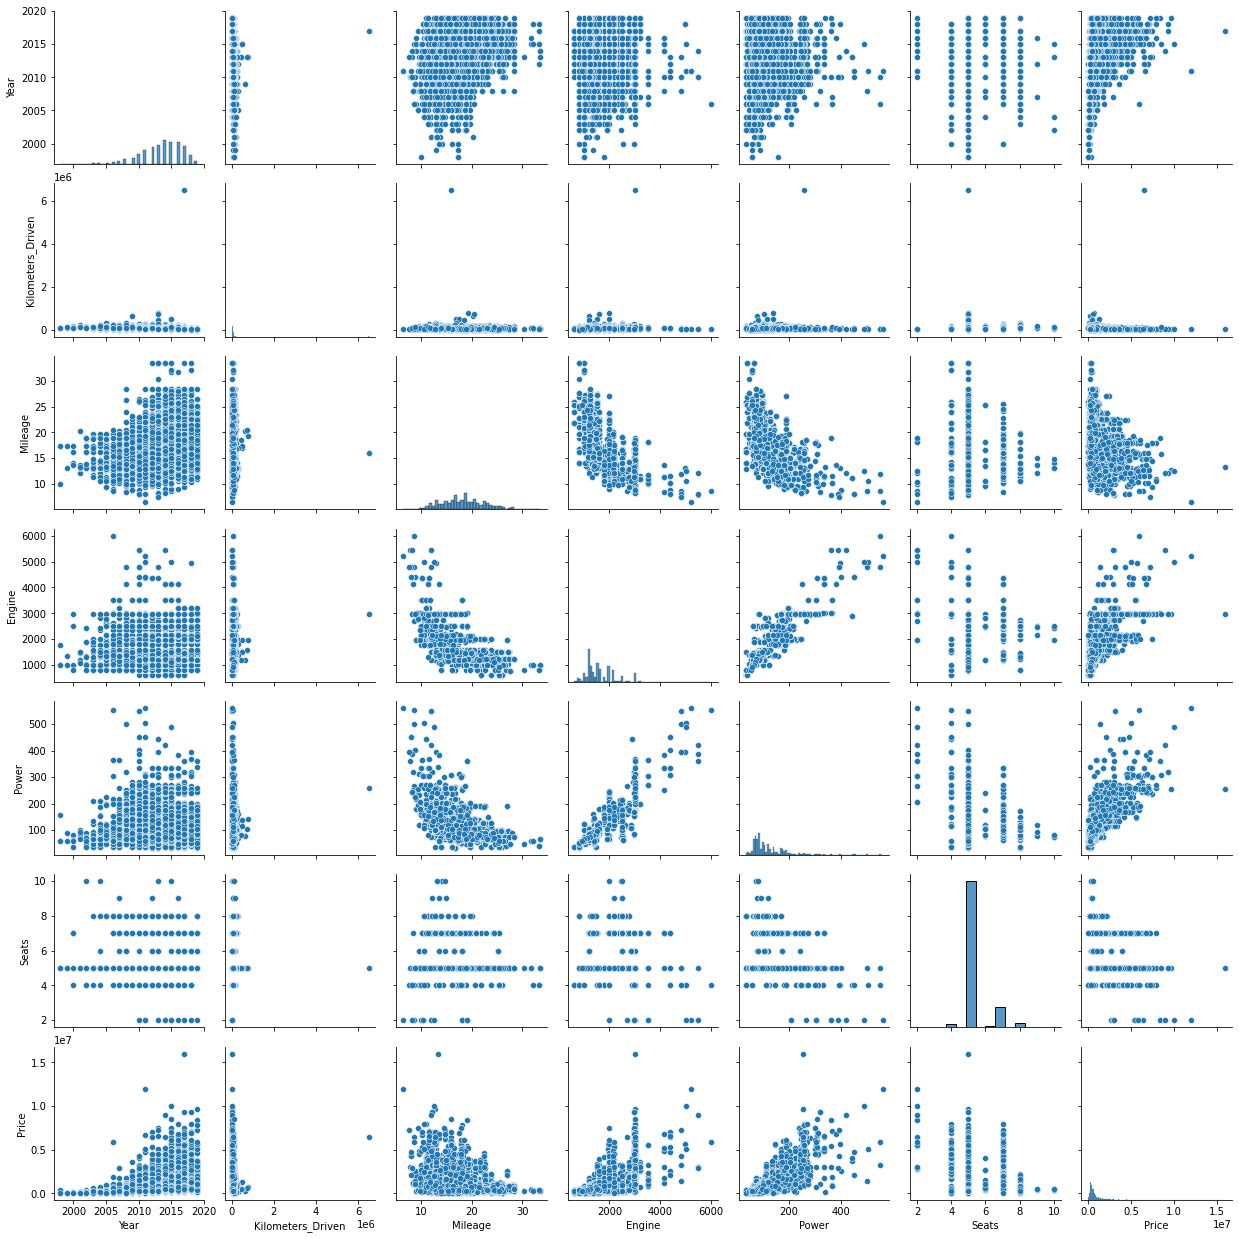

In [509]:
sns.pairplot(data)

In [510]:
data.shape

(5860, 11)

# Feature Transformation

In [43]:
data = pd.read_csv("data/Cleaned_Car_Details.csv")
data.head()

,Unnamed: 0,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon,2010,72000,CNG,Manual,First,26.60,998,58.16,5,175000
1,1,Hyundai Creta,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,1250000
2,2,Honda Jazz,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,450000
3,3,Maruti Ertiga,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,600000
4,4,Audi A4,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,1773999


In [44]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [45]:
data.shape

(5835, 11)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5835 non-null   object 
 1   Year               5835 non-null   int64  
 2   Kilometers_Driven  5835 non-null   int64  
 3   Fuel_Type          5835 non-null   object 
 4   Transmission       5835 non-null   object 
 5   Owner_Type         5835 non-null   object 
 6   Mileage            5835 non-null   float64
 7   Engine             5835 non-null   int64  
 8   Power              5835 non-null   float64
 9   Seats              5835 non-null   int64  
 10  Price              5835 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 501.6+ KB


In [47]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5835.000000,5.835000e+03,5835.000000,5835.000000,5835.000000,5835.000000,5.835000e+03
mean,2013.488603,5.825394e+04,18.369422,1622.720651,113.167453,5.284319,9.554545e+05
std,3.157938,9.235463e+04,4.185389,598.925858,53.831267,0.805930,1.119322e+06
min,1998.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,4.400000e+04
25%,2012.000000,3.346750e+04,15.300000,1198.000000,75.000000,5.000000,3.535000e+05
50%,2014.000000,5.251300e+04,18.400000,1495.000000,94.680000,5.000000,5.740000e+05
75%,2016.000000,7.229650e+04,21.100000,1984.000000,138.100000,5.000000,1.000000e+06
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,1.600000e+07


Outlier Detection

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


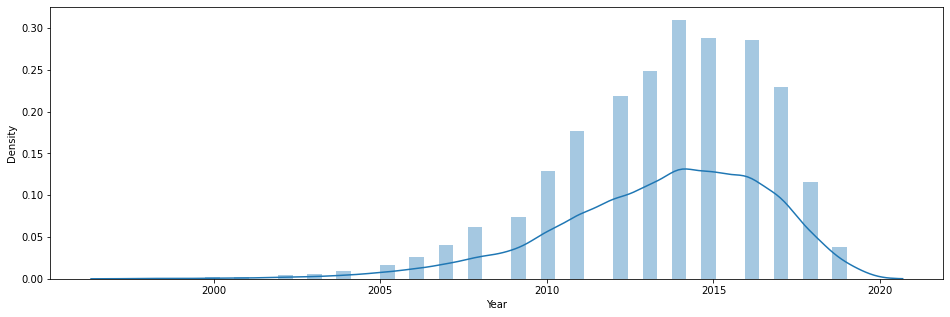

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


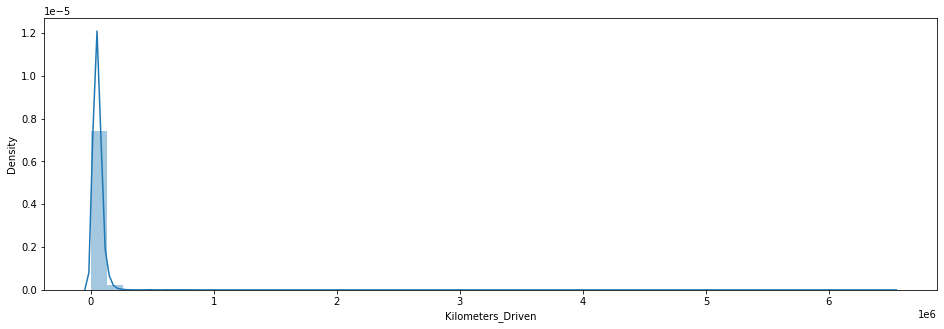

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


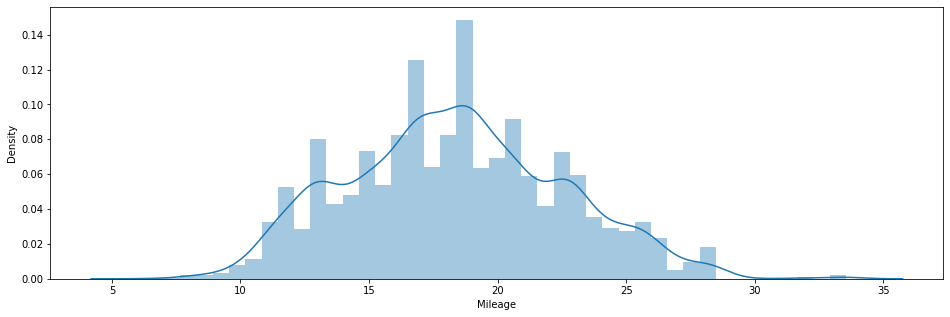

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


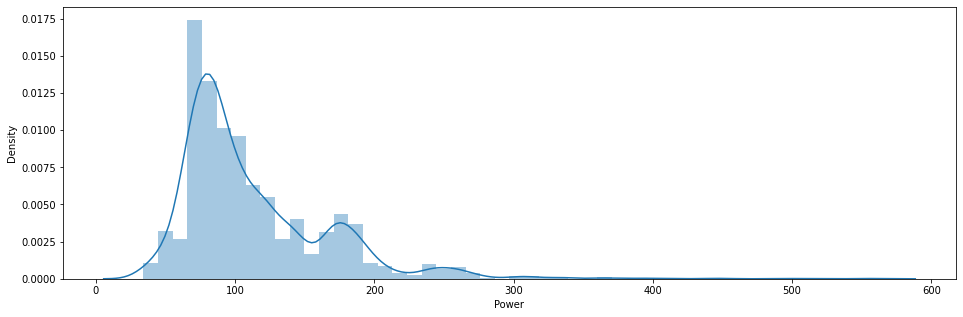

In [511]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(data[data.columns[i]])
        plt.show()

In [512]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        print(f'{data.columns[i]} : {data[data.columns[i]].skew()}')

Year : -0.8319282323477281
Kilometers_Driven : 58.53675705256516
Mileage : 0.2088404768696861
Power : 1.9337567402858464


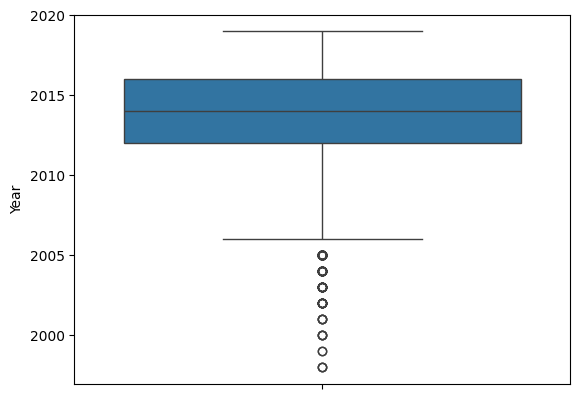

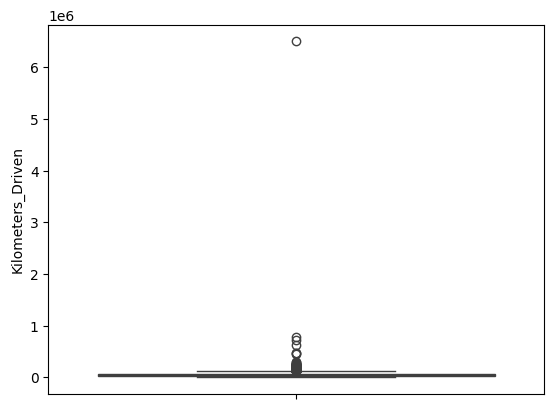

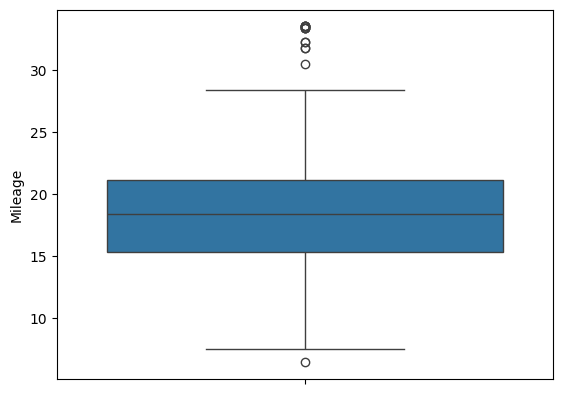

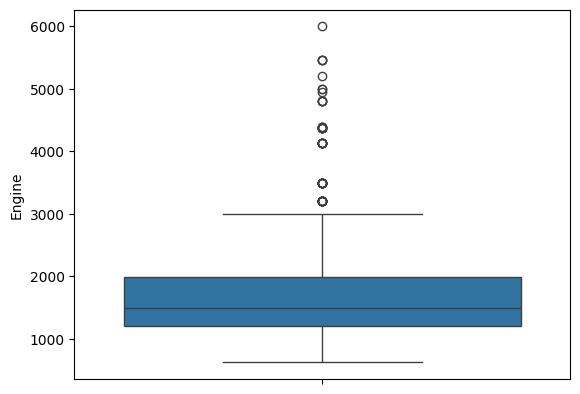

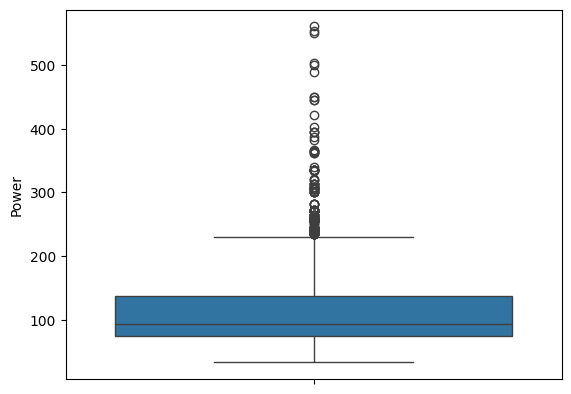

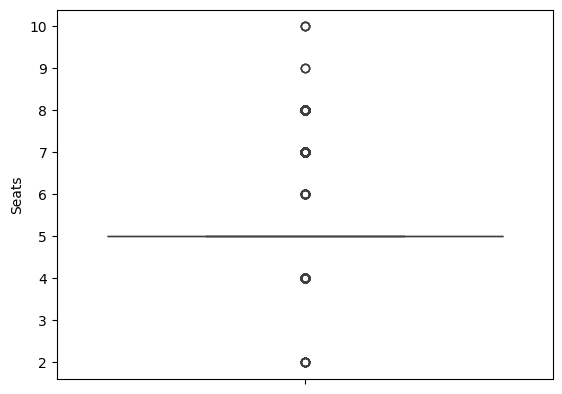

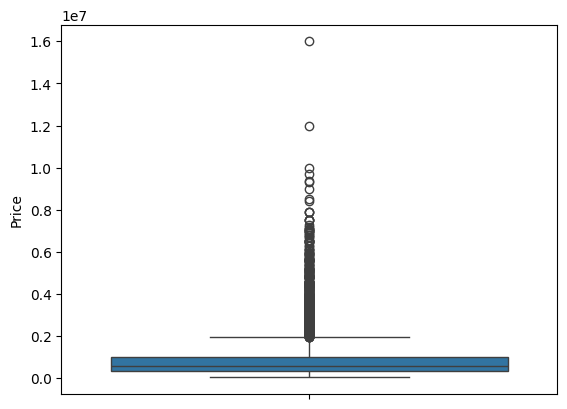

In [49]:
# Boxplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

In [50]:
# CAPPING OUTLIERS

# percentile25 = train["colnames"].quantile(0.25)
# percentile75 = train["colnames"].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

def outlier_removal(column_name):
    upper_limit, lower_limit = column_name.quantile(0.75) + 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25)), column_name.quantile(0.75) - 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25))
    
    column_name = np.where(column_name > upper_limit,upper_limit,
                                              np.where(column_name < lower_limit,lower_limit,
                                              column_name))
    return column_name

In [51]:
data["Year"] = outlier_removal(data["Year"])
data["Kilometers_Driven"] = outlier_removal(data["Kilometers_Driven"])
data["Mileage"] = outlier_removal(data["Mileage"])
data["Power"] = outlier_removal(data["Power"])

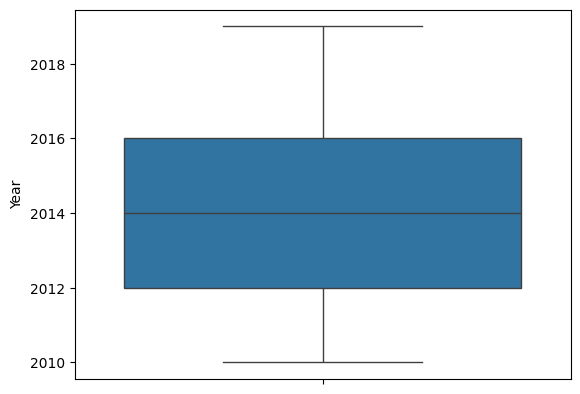

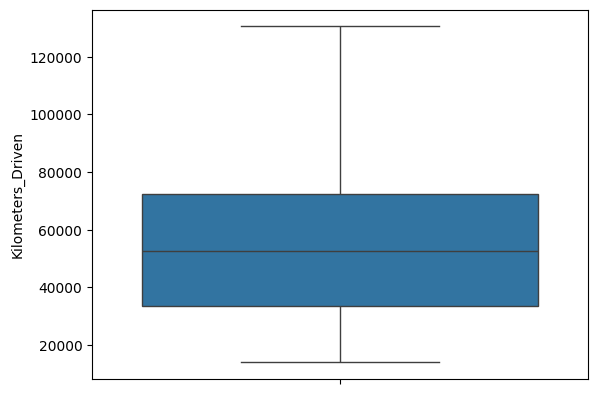

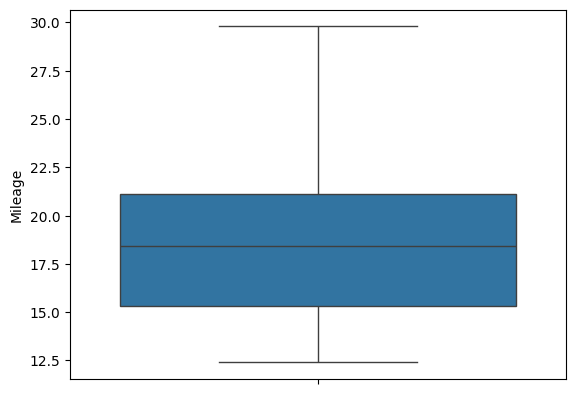

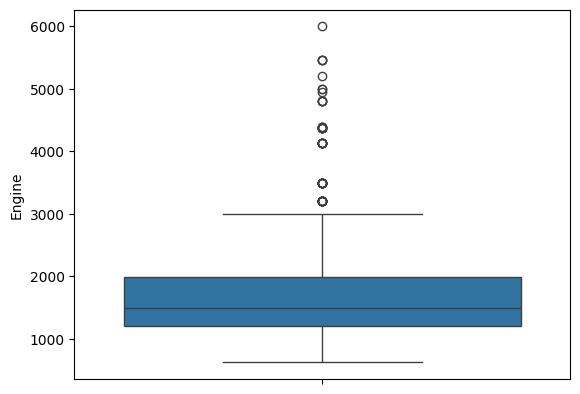

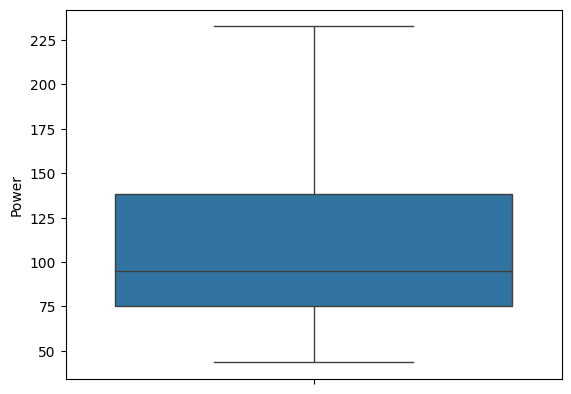

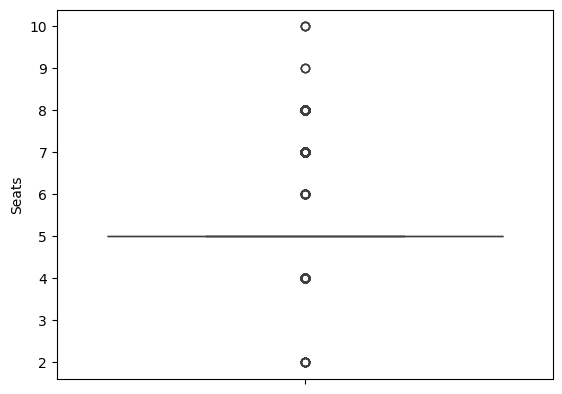

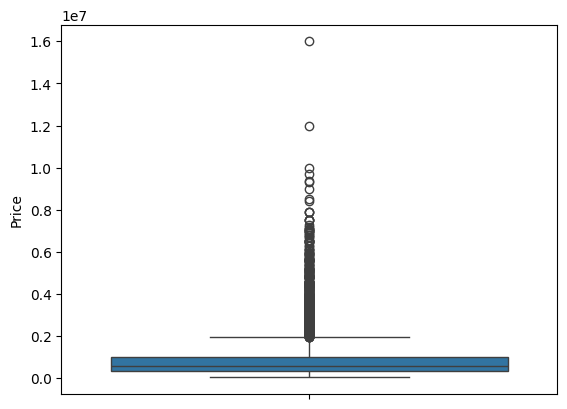

In [52]:
# Boxplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

/tmp/ipykernel_13236/2092820246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])


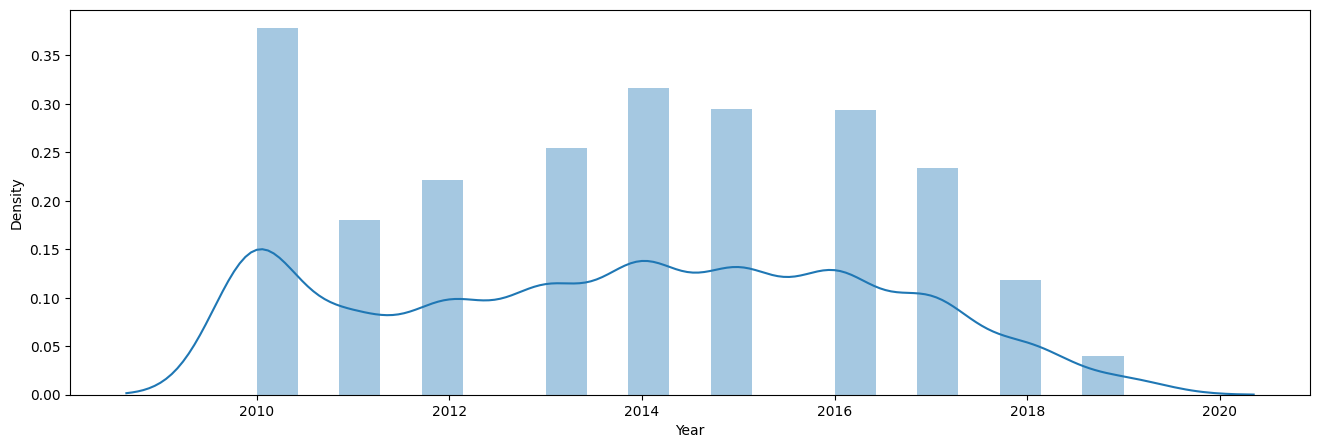

/tmp/ipykernel_13236/2092820246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])


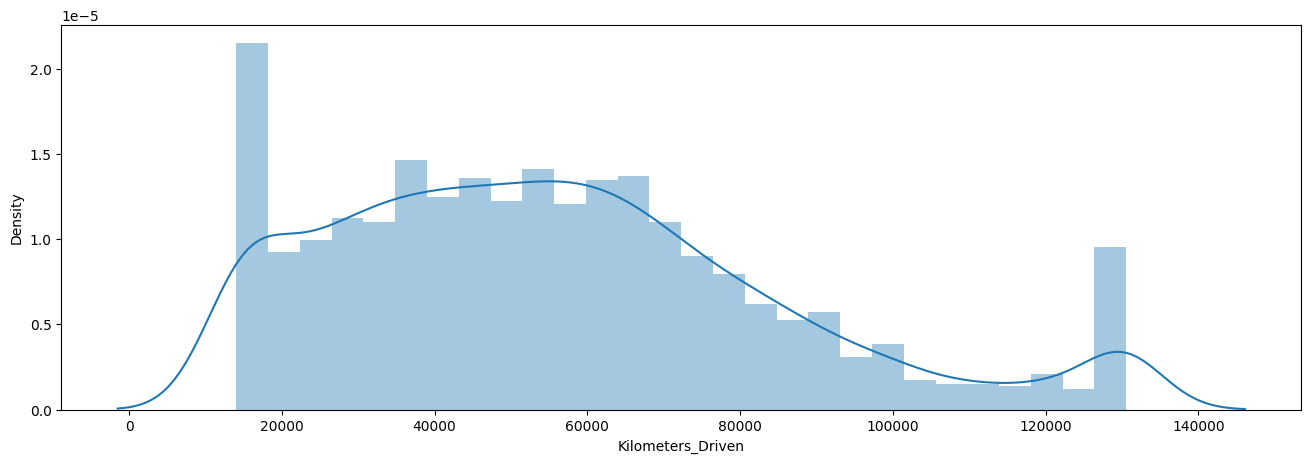

/tmp/ipykernel_13236/2092820246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])


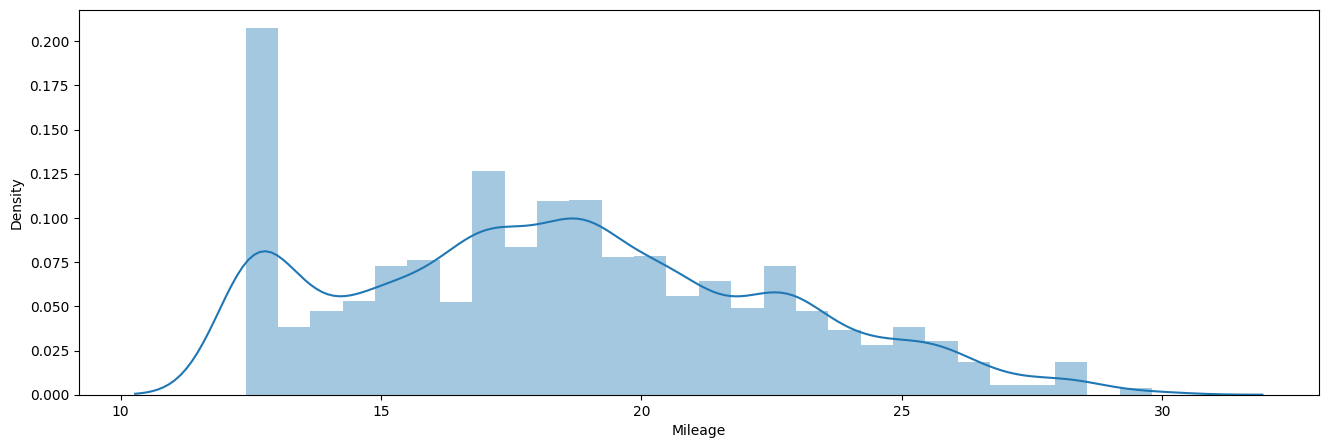

/tmp/ipykernel_13236/2092820246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])


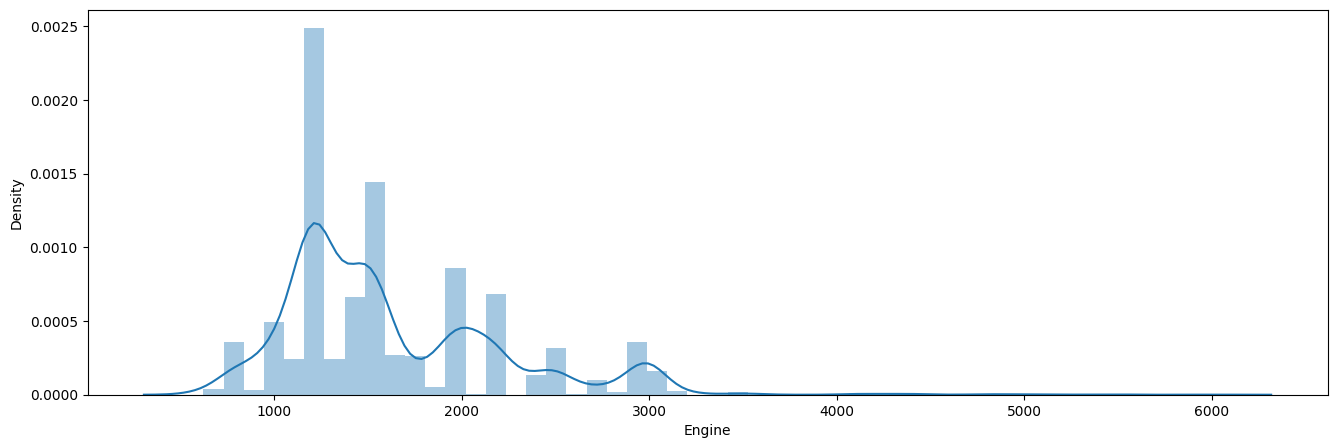

/tmp/ipykernel_13236/2092820246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])


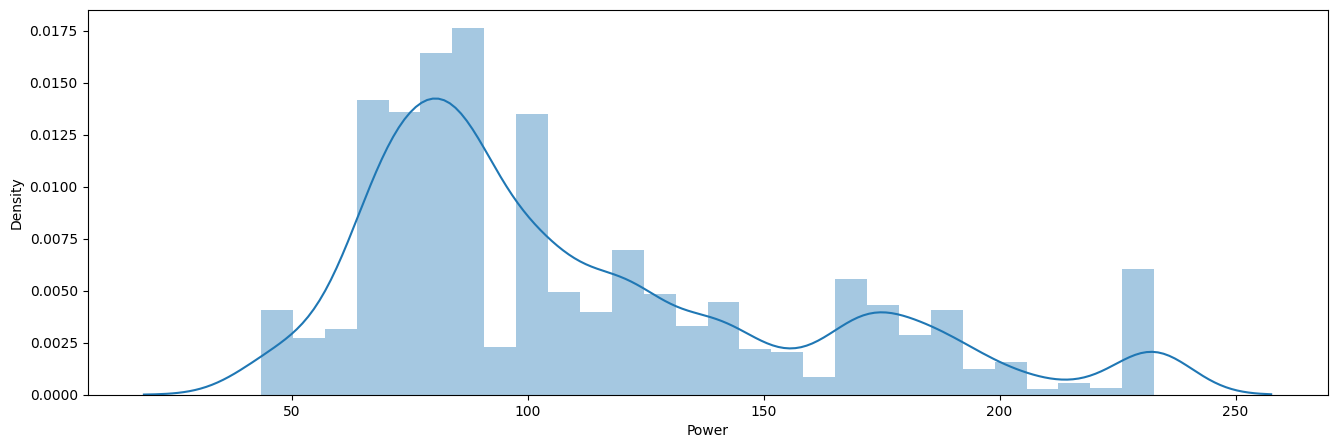

/tmp/ipykernel_13236/2092820246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])


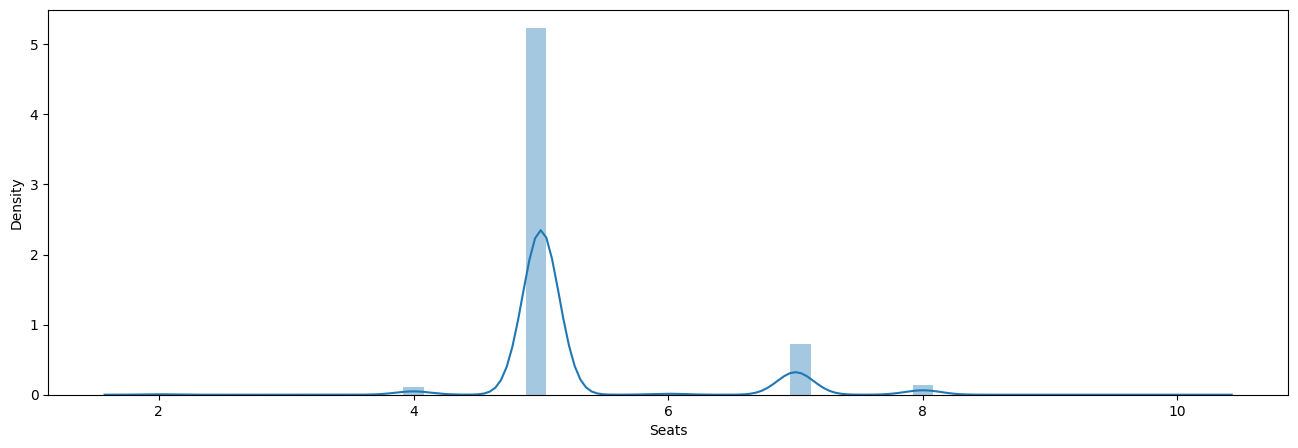

/tmp/ipykernel_13236/2092820246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])


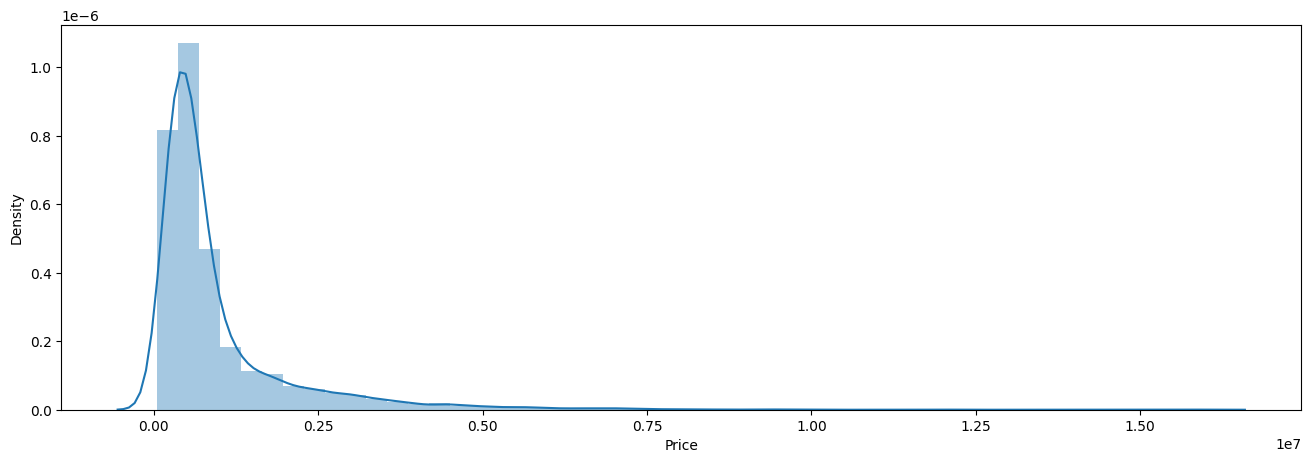

In [53]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(data[data.columns[i]])
        plt.show()

In [54]:
data.shape

(5835, 11)

In [55]:
data.shape

(5835, 11)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5835 non-null   object 
 1   Year               5835 non-null   float64
 2   Kilometers_Driven  5835 non-null   float64
 3   Fuel_Type          5835 non-null   object 
 4   Transmission       5835 non-null   object 
 5   Owner_Type         5835 non-null   object 
 6   Mileage            5835 non-null   float64
 7   Engine             5835 non-null   int64  
 8   Power              5835 non-null   float64
 9   Seats              5835 non-null   int64  
 10  Price              5835 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 501.6+ KB


In [57]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,2010.0,72000.0,CNG,Manual,First,26.60,998,58.16,5,175000
1,Hyundai Creta,2015.0,41000.0,Diesel,Manual,First,19.67,1582,126.20,5,1250000
2,Honda Jazz,2011.0,46000.0,Petrol,Manual,First,18.20,1199,88.70,5,450000
3,Maruti Ertiga,2012.0,87000.0,Diesel,Manual,First,20.77,1248,88.76,7,600000
4,Audi A4,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968,140.80,5,1773999


Handling Categorical Features 

Feature Scaling - Normalization

In [59]:
ohe = OneHotEncoder()
ohe.fit(data[["Name", "Fuel_Type","Transmission","Owner_Type"]])
ohe.categories_

[array(['Ambassador Classic', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi A7',
        'Audi A8', 'Audi Q3', 'Audi Q5', 'Audi Q7', 'Audi RS5', 'Audi TT',
        'BMW 1', 'BMW 3', 'BMW 5', 'BMW 6', 'BMW 7', 'BMW X1', 'BMW X3',
        'BMW X5', 'BMW X6', 'BMW Z4', 'Bentley Continental',
        'Chevrolet Aveo', 'Chevrolet Beat', 'Chevrolet Captiva',
        'Chevrolet Cruze', 'Chevrolet Enjoy', 'Chevrolet Optra',
        'Chevrolet Sail', 'Chevrolet Spark', 'Chevrolet Tavera',
        'Datsun GO', 'Datsun Redi', 'Datsun redi-GO', 'Fiat Avventura',
        'Fiat Grande', 'Fiat Linea', 'Fiat Punto', 'Force One',
        'Ford Aspire', 'Ford Classic', 'Ford EcoSport', 'Ford Ecosport',
        'Ford Endeavour', 'Ford Fiesta', 'Ford Figo', 'Ford Freestyle',
        'Ford Fusion', 'Ford Ikon', 'Ford Mustang', 'Honda Accord',
        'Honda Amaze', 'Honda BR-V', 'Honda BRV', 'Honda Brio',
        'Honda CR-V', 'Honda City', 'Honda Civic', 'Honda Jazz',
        'Honda Mobilio', 'Honda WR-V', 'Hond

In [60]:
clmn_tfr = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ["Name", "Fuel_Type","Transmission","Owner_Type"]),
                                   (StandardScaler(), ["Year","Kilometers_Driven","Mileage","Engine","Power","Seats"]),
                                    remainder="passthrough")

In [61]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [62]:
x_train.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1885,Honda City,2011.0,49999.0,Petrol,Manual,First,17.00,1497,118.0,5
3720,Hyundai i20,2016.0,19008.0,Petrol,Manual,First,17.00,1197,80.0,5
3844,Hyundai i20,2011.0,24000.0,Petrol,Manual,First,17.00,1197,80.0,5
868,Volkswagen Jetta,2012.0,58775.0,Diesel,Manual,First,19.33,1968,138.1,5
2464,Maruti Swift,2014.0,68218.0,Petrol,Manual,First,19.10,1197,85.8,5


In [63]:
y_train.head()

1885    380000
3720    525000
3844    425000
868     564000
2464    490000
Name: Price, dtype: int64

# Model Building

**Linear Regression, Ridge(L2), Lasso(L1), or ElasticNet Regression**

In [83]:
lr = LinearRegression()
pipe = make_pipeline(clmn_tfr,lr)
linereg_model = pipe.fit(x_train,y_train)
pred = linereg_model.predict(x_test)
print(r2_score(y_test, pred)*100)
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

92.71867576686232
MAE: 0.17021566083901288
RMSE: 0.237465539698248


In [88]:
score = []
for i in range(5000):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    lr = LinearRegression()
    pipe = make_pipeline(clmn_tfr,lr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  1854
0.887142669950291


In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {
    "ridge__alpha": [0.01, 0.1, 1, 10, 100]
}

pipe_ridge = make_pipeline(clmn_tfr, ridge)
search_ridge = GridSearchCV(pipe_ridge, param_grid=params, cv=10, scoring='r2')
ridgeL2_model = search_ridge.fit(x_train, y_train)

print("Best Alpha:", ridgeL2_model.best_params_)
print("Best CV R²:", ridgeL2_model.best_score_ * 100)

# Test Set Score
pred = ridgeL2_model.predict(x_test)
print("Test R²:", r2_score(y_test, pred) * 100)

Best Alpha: {'ridge__alpha': 1}
Best CV R²: 91.77694829065773
Test R²: 92.61555526420797


In [85]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=10000)
params = {
    "lasso__alpha": [0.001, 0.01, 0.1, 1, 10]
}

pipe_lasso = make_pipeline(clmn_tfr, lasso)
search_lasso = GridSearchCV(pipe_lasso, param_grid=params, cv=10, scoring='r2')
lasoL2_model = search_lasso.fit(x_train, y_train)

print("Best Alpha:", lasoL2_model.best_params_)
print("Best CV R²:", lasoL2_model.best_score_ * 100)

# Test Set Score
pred = lasoL2_model.predict(x_test)
print("Test R²:", r2_score(y_test, pred) * 100)

Best Alpha: {'lasso__alpha': 0.001}
Best CV R²: 89.18760146389506
Test R²: 89.9234113472311


In [86]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(max_iter=10000)
params = {
    "elasticnet__alpha": [0.001, 0.01, 0.1, 1],
    "elasticnet__l1_ratio": [0.2, 0.5, 0.7, 1]
}

pipe_enet = make_pipeline(clmn_tfr, enet)
search_enet = GridSearchCV(pipe_enet, param_grid=params, cv=10, scoring='r2')
elasticnet_model = search_enet.fit(x_train, y_train)

print("Best Params:", elasticnet_model.best_params_)
print("Best CV R²:", elasticnet_model.best_score_ * 100)

# Test Set Score
pred = elasticnet_model.predict(x_test)
print("Test R²:", r2_score(y_test, pred) * 100)

Best Params: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.2}
Best CV R²: 90.72888365098004
Test R²: 91.59037552766193


Ridge has the best combination of CV and test performance.

It is more stable than Lasso and ElasticNet when you have many correlated features, which is common after OneHotEncoding.

Also, the very low alpha in Lasso and ElasticNet implies regularization is minimal — confirming Ridge is more appropriate for your case.**

In [87]:
# pickle.dump(ridgeL2_model,open("ridgeL2_model_Car_Price_Prediction.pkl","wb"))

**XGBoost Regressor**

In [74]:
# !pip install xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=8)
pipe_xgb = make_pipeline(clmn_tfr, xgb)
xgb_model = pipe_xgb.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
print("XGB R2:", r2_score(y_test, pred) * 100)
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

XGB R2: 93.65932382157011
MAE: 0.1618705670759495
RMSE: 0.22159665318072674


In [89]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=8, objective='reg:squarederror')

param_grid = {
    'xgbregressor__n_estimators': [100, 200],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__max_depth': [4, 6, 8],
    'xgbregressor__subsample': [0.8, 1],
    'xgbregressor__colsample_bytree': [0.8, 1]
}

pipe_xgb = make_pipeline(clmn_tfr, xgb)

grid_search = GridSearchCV(pipe_xgb, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_ * 100)

# Evaluate on test set
best_xgb = grid_search.best_estimator_
pred = best_xgb.predict(x_test)
print("Test R²:", r2_score(y_test, pred) * 100)

Best Params: {'xgbregressor__colsample_bytree': 0.8, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 0.8}
Best CV R²: 91.61318182945251
Test R²: 87.71212100982666


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import randint, uniform

# Define the base XGBRegressor
xgb = XGBRegressor(random_state=8)

# Wrap it in a pipeline
pipe_xgb = make_pipeline(clmn_tfr, xgb)

# Define parameter distribution
param_distributions = {
    'xgbregressor__n_estimators': randint(100, 500),
    'xgbregressor__learning_rate': uniform(0.01, 0.3),
    'xgbregressor__max_depth': randint(3, 10),
    'xgbregressor__subsample': uniform(0.6, 0.4),
    'xgbregressor__colsample_bytree': uniform(0.6, 0.4)
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_distributions,
    n_iter=50,  # You can increase for better tuning
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=8
)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters and CV score
print("Best Params:", random_search.best_params_)
print("Best CV R²:", random_search.best_score_ * 100)

# Evaluate on test set
randcv_xgb_best_model = random_search.best_estimator_
pred = randcv_xgb_best_model.predict(x_test)

print("Test R²:", r2_score(y_test, pred) * 100)
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'xgbregressor__colsample_bytree': np.float64(0.6114928195853181), 'xgbregressor__learning_rate': np.float64(0.11550542088103602), 'xgbregressor__max_depth': 5, 'xgbregressor__n_estimators': 420, 'xgbregressor__subsample': np.float64(0.905664052546384)}
Best CV R²: 92.06561803817749
Test R²: 89.24959897994995
MAE: 143557.34375
RMSE: 353101.91453460004


In [95]:
pickle.dump(randcv_xgb_best_model,open("randcv_xgb_best_model_Car_Price_Prediction.pkl","wb"))